# Predicting House Prices

In this project we will be using the housing data from city of Ames,lowe,United States from 2006 to 2010. More information on why the data was collected can be found [here](https://doi.org/10.1080/10691898.2011.11889627). Additional information on the columns can be found [here](https://s3.amazonaws.com/dq-content/307/data_description.txt).

The objective of this project is to predict the prices of the house given the information available. The technique which we will be focusing on in this particular project to predcit the prices is Linear Regression.

In [1]:
# Import the data

import pandas as pd
import numpy as np

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
data=pd.read_csv("AmesHousing.tsv",sep='\t')


In [2]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [4]:
data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


# Identifying Numeric Columns in the data

First we will try to identify all the columns which are numeric in nature because Linear Regression will consider only those features which are numeric.

In [5]:
numeric_cols=data.select_dtypes(include=['int64','float64']).copy()

#The above can also be done using the below code

#numeric_cols=data.select_dtypes(include=['int64','float64'])

In [6]:
numeric_cols.columns.sort_values()

Index(['1st Flr SF', '2nd Flr SF', '3Ssn Porch', 'Bedroom AbvGr',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Bsmt Unf SF', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Enclosed Porch', 'Fireplaces', 'Full Bath',
       'Garage Area', 'Garage Cars', 'Garage Yr Blt', 'Gr Liv Area',
       'Half Bath', 'Kitchen AbvGr', 'Lot Area', 'Lot Frontage',
       'Low Qual Fin SF', 'MS SubClass', 'Mas Vnr Area', 'Misc Val', 'Mo Sold',
       'Open Porch SF', 'Order', 'Overall Cond', 'Overall Qual', 'PID',
       'Pool Area', 'SalePrice', 'Screen Porch', 'TotRms AbvGrd',
       'Total Bsmt SF', 'Wood Deck SF', 'Year Built', 'Year Remod/Add',
       'Yr Sold'],
      dtype='object')

Now we have the list of all columns which are by default numeric in nature. However the *Order* and *PID* are mostly identifiers and do not tell anything abbout the property. Hence we will not be considering them in the model.

Although the above mentioned columns have numeric values when we refer the [documentation of the columns](https://s3.amazonaws.com/dq-content/307/data_description.txt) there are some columns in the data which are non numeric but thay actually have some ordering. For example the *Utilities* column has values as below:

| Value  	| Description                               	|
|--------	|-------------------------------------------	|
| AllPub 	| All public Utilities (E,G,W,& S)          	|
| NoSewr 	| Electricity, Gas, and Water (Septic Tank) 	|
| NoSeWa 	| Electricity and Gas Only                  	|
| ELO    	| Electricity only                          	|

The values basically tell the number of utilities available in the house. So even though these columns are numeric we can convert them to values like 4 for AllPub,2 for both NoSewr and NoSeWa and 1 for ELO.

Similarly we have column like *Exter Qual* which has values as below:

| Value 	| Description     	|
|-------	|-----------------	|
| Ex    	| Excellent       	|
| Gd    	| Good            	|
| TA    	| Average/Typical 	|
| Fa    	| Fair            	|
| Po    	| Poor            	|

Here we can have numbers instead iof text because the data has certain ordering. Excelling will mean very high quality while poor will mean very low quality.


We will be converting these type of columns to numeric so that they can be used in the Regression Analysis.

In [7]:
# Utilities
data['Utilities'].value_counts()

AllPub    2927
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64

Here we can see that there are hardly any other values in the dataset apart from AllPub. So this particular feature is not going to add any value hence we will not be making any changes to the same.

###### '''
def cat_mapping(column):
        if val=='Ex':
            return 5
        elif val=='Gd':
            return 4
        elif val=='TA':
            return 3
        elif val=='Fa':
            return 2
        elif val=='Po':
            return 1

'''

Here are the columns which we will consider to replace with numbers since they specify certain ordering.

*Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,
BsmtFin Type 1,BsmtFin Type 2,Garage Finish*

While most of the columns have values like we have seen above for Exter Qual there are some other values like NA for *Bsmt Qual* which will mean no basements as per the 
Although the above mentioned columns have numeric values when we refer the [documentation of the columns](https://s3.amazonaws.com/dq-content/307/data_description.txt) .Also *BsmtFin Type 1* column has values defined like GLQ(Good Living Quarters),ALQ(Average Living Quarters) and so on.

We will accordingly create a mappinmg dictionary which will represent all of this values and then replace the column values.

In [8]:
data['BsmtFin Type 1'].value_counts()

GLQ    859
Unf    851
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFin Type 1, dtype: int64

In [9]:
data['Garage Finish'].value_counts()

Unf    1231
RFn     812
Fin     728
Name: Garage Finish, dtype: int64

In [10]:
# Create a mappimg dictionary
replacements={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'Fin':3,'RFn':2,
              'Unf':1}

In [11]:
columns =['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Bsmt Exposure','Heating QC','Kitchen Qual','Fireplace Qu',
         'Garage Qual','Garage Cond','BsmtFin Type 1','BsmtFin Type 2','Garage Finish']

for col in columns:
    a=data[col].replace(replacements)
    numeric_cols=pd.concat([numeric_cols,a],axis=1)


# Categorical Variables

Now let's focus on the variables which do not really have any order and the categories in a column just distinguish each other. For example slope of property has three values gentle slope,moderate slope and severe slope. Here the three values do not have any ordering. They just represent three different types of slopes. In this case if we want to use this data we can convert this column to dummy variables.
[Refer this](https://stattrek.com/multiple-regression/dummy-variables.aspx) to understand more about dummy variables.
However dummy variables will also increase the dimensions of the data making the model more computationally intensive. 

Instead of making dummy variable we can replace the categories by their frequencies as per they appear in the respective column. 
For this as well we will be selecting only those columns which have a good enough distribution of values.

In [12]:
categorical_cols=data.select_dtypes(include=['object'])

'''
Since the original data had some columns which we later converted to numeric in the numeric_cols dataframe
we will be removing out those columns which are present in nnumeric_cols dataframe
'''
columns=categorical_cols.columns
cat_cols=columns[~(categorical_cols.columns.isin(numeric_cols.columns))]

In [13]:
for col in cat_cols:
    print(col,"\n",data[col].value_counts(normalize=True),'\n','------------------------')

MS Zoning 
 RL         0.775768
RM         0.157679
FV         0.047440
RH         0.009215
C (all)    0.008532
A (agr)    0.000683
I (all)    0.000683
Name: MS Zoning, dtype: float64 
 ------------------------
Street 
 Pave    0.995904
Grvl    0.004096
Name: Street, dtype: float64 
 ------------------------
Alley 
 Grvl    0.606061
Pave    0.393939
Name: Alley, dtype: float64 
 ------------------------
Lot Shape 
 Reg    0.634471
IR1    0.334130
IR2    0.025939
IR3    0.005461
Name: Lot Shape, dtype: float64 
 ------------------------
Land Contour 
 Lvl    0.898635
HLS    0.040956
Bnk    0.039932
Low    0.020478
Name: Land Contour, dtype: float64 
 ------------------------
Utilities 
 AllPub    0.998976
NoSewr    0.000683
NoSeWa    0.000341
Name: Utilities, dtype: float64 
 ------------------------
Lot Config 
 Inside     0.730375
Corner     0.174403
CulDSac    0.061433
FR2        0.029010
FR3        0.004778
Name: Lot Config, dtype: float64 
 ------------------------
Land Slope 
 Gtl

We have selected the *Lot Shape*,*Neighborhood*,*Mas Vnr Type*,*Foundation*,*Garage Type* columns to convert to dummies as per their distribution of values. There are some columns which have a good enough distribution of values but we already have other other numeric columns which will provide similar information hence we will not be considering those.


In [14]:

cols=["Lot Shape","Neighborhood","Mas Vnr Type","Foundation","Garage Type"]

Lot_shape_dict=data["Lot Shape"].value_counts()
data['Lot_shape_enc']=data["Lot Shape"].map(Lot_shape_dict)

Neighborhood_dict=data["Neighborhood"].value_counts()
data['Neighborhood_enc']=data["Neighborhood"].map(Neighborhood_dict)

Mas_Vnr_Type_dict=data["Mas Vnr Type"].value_counts()
data['Mas_Vnr_Type_enc']=data["Mas Vnr Type"].map(Mas_Vnr_Type_dict)

Foundation_dict=data["Foundation"].value_counts()
data['Foundation_enc']=data["Foundation"].map(Foundation_dict)

Garage_Type_dict=data["Garage Type"].value_counts()
data['Garage_Type_enc']=data["Garage Type"].map(Garage_Type_dict)

numeric_cols=pd.concat([numeric_cols,data['Lot_shape_enc'],data['Neighborhood_enc'],data['Mas_Vnr_Type_enc'],
                        data['Foundation_enc'],data['Garage_Type_enc']],axis=1)


# Missing Values in Data
Now that we have all the required columns in numeric form we need to look out for missing values in the data.
If a particular column has more than 15% missing values we will be getting rid of the column altogether. If it is lesser we will replace the missing values with some meaningful data.

In [15]:
null_counts=pd.DataFrame(numeric_cols.isnull().sum(),columns=['Counts'])
null_counts["percent_missing"]=null_counts/data.shape[0]

In [16]:
null_counts[null_counts['Counts']>0]

,Counts,percent_missing
Lot Frontage,490,0.167235
Mas Vnr Area,23,0.007850
BsmtFin SF 1,1,0.000341
BsmtFin SF 2,1,0.000341
Bsmt Unf SF,1,0.000341
Total Bsmt SF,1,0.000341
Bsmt Full Bath,2,0.000683
Bsmt Half Bath,2,0.000683
Garage Yr Blt,159,0.054266
Garage Cars,1,0.000341


From the above we can see that*lot Frontage* column has ~17% missing values. Hence we will be dropping this column from our regression model.

In [17]:
#Replacing the missing values with mean
numeric_cols.fillna(numeric_cols.mean(),inplace=True)

# Feature Engineering

Broadly the process of processing and creating new features is known as feature engineering.

In the above data we can use some existing features or modify some existing features to create additional features.

We have a *Year Built* and *Yr Sold* columns in the data. Individually they would not make much sense to the Price. However if we calculate the difference between them which would give the age of the house when it was sold that would be a much better variable.

In [18]:
numeric_cols['House_Age']=numeric_cols['Yr Sold']-numeric_cols['Year Built']

In [19]:
numeric_cols['Garage_Age']=numeric_cols['Yr Sold']-numeric_cols['Garage Yr Blt']

In [20]:
numeric_cols.drop(columns=['Yr Sold','Year Built','Garage Yr Blt','Year Remod/Add'],axis=1,inplace=True)

# Correlation with Target Variable

Now we will start looking for features which best possible relate with the Sales Price of the house. This needs to be done since Linear Regression assumes that the features are linearly related with the target variable.

To do this we would check the correlation of each feature with Sales Price Variable and only select those variables which have a correlation of 0.3 or higher.We will need to consider the absolute values for correlation since a correlation value of 0.3 or higher on both positive or negative side will mean the feature is linearly related with target variable only the direction is different.

In [21]:
numeric_cols.corr().abs()['SalePrice'].sort_values(ascending=False)

SalePrice           1.000000
Overall Qual        0.799262
Gr Liv Area         0.706780
Exter Qual          0.697970
Kitchen Qual        0.672914
Bsmt Qual           0.664527
Garage Cars         0.647861
Garage Area         0.640385
Total Bsmt SF       0.632105
1st Flr SF          0.621676
House_Age           0.558907
Full Bath           0.545604
Garage_Age          0.511451
Mas Vnr Area        0.505784
Garage Finish       0.502400
TotRms AbvGrd       0.495474
Fireplaces          0.474558
Heating QC          0.450325
BsmtFin SF 1        0.432794
Mas_Vnr_Type_enc    0.414186
Lot Frontage        0.340751
Wood Deck SF        0.327143
Open Porch SF       0.312951
BsmtFin Type 1      0.305909
Foundation_enc      0.297294
Lot_shape_enc       0.296498
Half Bath           0.285056
Bsmt Full Bath      0.275894
2nd Flr SF          0.269373
Lot Area            0.266549
Fireplace Qu        0.247417
PID                 0.246521
Garage_Type_enc     0.202108
Neighborhood_enc    0.198119
Garage Qual   

In [22]:
# Consider only those values who have a correlation value of higher than 0.3
corr_mat=numeric_cols.corr().abs()['SalePrice'].sort_values(ascending=False)

numeric_cols=numeric_cols[corr_mat[corr_mat>0.3].index]

In [23]:
numeric_cols.shape

(2930, 24)

# Correlation Within the Features(Multicollinearity)

Above we checked for correlation of the features with the target variable. Now we will check if there is correlation within the features. This is generaaly not desired to have and if it is present then we will be getting rid of one of the two variables which exibit this relation.

This can be done using two ways :
1. Calculate Variance Inflation Factor (Number higher than 5 indicates multicollinearity)
2. Calculate correlations of the various features within themselves and eliminate the ones which show high correlation.

In [24]:
# Calculate VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

#pd.set_option('display.float_format', lambda x:'%.nf' % x)
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(numeric_cols.drop(['SalePrice'],axis=1)).sort_values('VIF',ascending=False)




#variance_inflation_factor(X.values, i)

,variables,VIF
2,Exter Qual,102.139718
3,Kitchen Qual,69.913606
0,Overall Qual,68.953063
4,Bsmt Qual,64.979863
14,TotRms AbvGrd,52.946570
1,Gr Liv Area,49.051579
5,Garage Cars,37.280384
8,1st Flr SF,35.612961
6,Garage Area,33.190109
16,Heating QC,29.343270


In [71]:
def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        max_vif_val = max(vif)
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('Dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' with VIF value : ' + str(max_vif_val))
            del variables[maxloc]
            dropped = True
 
    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]


In [72]:
calculate_vif_(numeric_cols.drop(['SalePrice'],axis=1))

Dropping 'Exter Qual' with VIF value : 102.20327056861254
Dropping 'Overall Qual' with VIF value : 63.62578033664728
Dropping 'Bsmt Qual' with VIF value : 55.454337332741765
Dropping 'Kitchen Qual' with VIF value : 46.08479233251112
Dropping '1st Flr SF' with VIF value : 38.15717082817779
Dropping 'Gr Liv Area' with VIF value : 29.57526425897831
Dropping 'Heating QC' with VIF value : 20.69892320061038
Dropping 'Lot Frontage' with VIF value : 18.88273724186915
Dropping 'Total Bsmt SF' with VIF value : 12.559131889650697
Dropping 'Mas_Vnr_Type_enc' with VIF value : 11.762571531351755
Dropping 'Full Bath' with VIF value : 10.745701234109891
Dropping 'BsmtFin Type 1' with VIF value : 7.38357701307445
Dropping 'Garage Area' with VIF value : 6.358557508764255
Remaining variables:
Index(['House_Age', 'Mas Vnr Area', 'Garage Finish', 'Fireplaces',
       'BsmtFin SF 1', 'Wood Deck SF', 'Open Porch SF'],
      dtype='object')


,House_Age,Mas Vnr Area,Garage Finish,Fireplaces,BsmtFin SF 1,Wood Deck SF,Open Porch SF
0,50.0,112.000000,3.000000,2.0,639.000000,210.0,62.0
1,49.0,0.000000,1.000000,0.0,468.000000,140.0,0.0
2,52.0,108.000000,1.000000,0.0,923.000000,393.0,36.0
3,42.0,0.000000,3.000000,2.0,1065.000000,0.0,0.0
4,13.0,0.000000,3.000000,1.0,791.000000,212.0,34.0
5,12.0,20.000000,3.000000,1.0,602.000000,360.0,36.0
6,9.0,0.000000,3.000000,0.0,616.000000,0.0,0.0
7,18.0,0.000000,2.000000,0.0,263.000000,0.0,82.0
8,15.0,0.000000,2.000000,1.0,1180.000000,237.0,152.0
9,11.0,0.000000,3.000000,1.0,0.000000,140.0,60.0


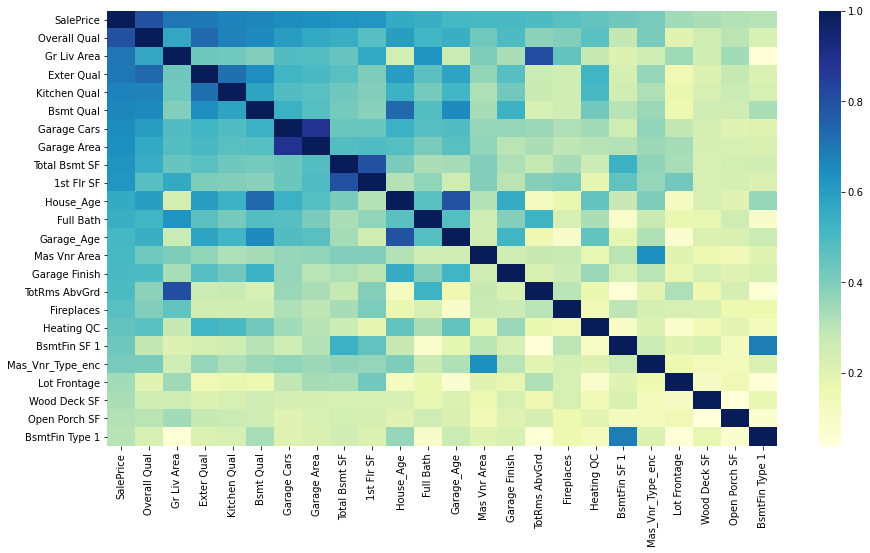

In [25]:
# Correlation matrix

import matplotlib.pyplot as plt
import seaborn as sns

corr_mat_overall=numeric_cols.corr().abs()

plt.figure(figsize=(15,8))
sns.heatmap(corr_mat_overall,cmap='YlGnBu')
plt.show()

From the above we can see that Gr Liv Area and TotRms AbvGrd are correlated. Also Garage Area and Garage Cars seem to be correlated. High correlation can be seen in Garage_Age and House_Age as well.

From these set of columns we will be retaining only one column. We will be retaining Gr Liv Area and Garage Area columns since they are continuous variables and capture more nuance. Also we will retain House_Age since it seems to be a more informative variable than Garage_Age.

In [26]:
numeric_cols.drop(columns=['TotRms AbvGrd','Garage Cars','Garage_Age'],axis=1,inplace=True)

# Outlier detection and Removal
Now that we have removed the correlated variables we will be getting rid of the values which are too far off from the rest of the values. These values are nothing but outliers.

In [27]:
for column_name in numeric_cols.columns:
    Q1=np.percentile(numeric_cols[column_name],25)
    Q2=np.percentile(numeric_cols[column_name],50)
    Q3=np.percentile(numeric_cols[column_name],75)
    '''
    Get first,second and third quartile for very column '''
    
    IQR=Q3-Q1
    '''
    Calculate Inter Quartile range'''
    
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    '''
    Calculate the lower and upper limit. Any value in the column lower than lower limit and higher than upper limit will be
    excluded'''
    numeric_cols[column_name]=np.where(numeric_cols[column_name]<low_lim,low_lim,numeric_cols[column_name])
    numeric_cols[column_name]=np.where(numeric_cols[column_name]>up_lim,up_lim,numeric_cols[column_name])
    

# Building the model

Now that we are done with the data preparation part we will focus on building the model. We will divide the dataset into train and test. First build the model on train set and then test the accuracy on test set.

In [52]:
# We will refer X as input variables and Y as target variable
X=numeric_cols.iloc[:,1:]
Y=numeric_cols.iloc[:,0].values
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=1)
print(X_train.shape)
print(X_test.shape)



(2344, 20)
(586, 20)


In [62]:
# Scaling the data


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
#Y_train = sc.fit_transform(Y_train.reshape(-1,1))  # reshape because it needs a 2D array


In [63]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


model=lr.fit(X_train,Y_train)

print('R_Squared coefficient of the model is',model.score(X_train,Y_train))

R_Squared coefficient of the model is 0.878910631058686


In [64]:
# Predicting on the test set
predictions=model.predict(X_test)
#predictions=sc.inverse_transform(predictions)

In [65]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(Y_test,predictions))
rmse

21729.37079292954

In [66]:
model.intercept_

177923.06313993174

In [67]:
model.coef_

array([15668.67048867, 18507.45848512,  4318.05272589,  6242.10870442,
        4420.88004845,  6101.64457024,  6185.22705119,  1903.23282432,
       -4061.33430846,  -760.87748854,  2404.87990672,  1968.11286654,
        5611.85953106,  4123.11606774,  5429.73891214,  2514.08852745,
        4063.46171563,  2135.45814622,   896.16377885,  2446.71207092])

In [68]:
#Plot actual vs predicted line to gauge model performance compared to perfect fit
def plot_real_vs_predicted(y_test, y_pred):
    """
    :param y_test: Ground truth (correct) target values.
    :param y_pred: Estimated target values.
    :return: Plot
    """
    plt.plot(y_test, y_pred, 'ro')
    
    plt.plot(y_test, y_test, 'g-')
    
    plt.xlabel('actual')
    
    plt.ylabel('pred')
    
    plt.show()
    
    return plt

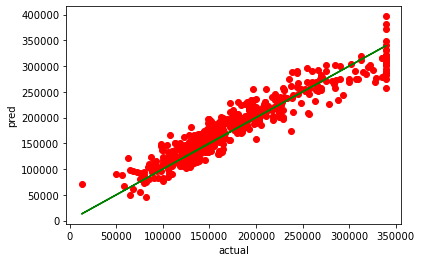

In [69]:
plot_real_vs_predicted(Y_test,predictions)
plt.show()

# Building the model using Recursive Feature Elimination

The Recursive Feature Elimination feature works by recursively removing variables and building a model based on the variables that remain.It uses the model accuracy to determine which features or combination of features contribute most to the target variable.

In [76]:
from sklearn.feature_selection import RFE

rfe=RFE(model,n_features_to_select=10)  # We will be selecting top 10 features
rfe_model=rfe.fit(X_train,Y_train)

In [77]:
rfe_model.n_features_

10

In [78]:
X_train.columns[rfe_model.support_]  # .support_ will return a array with Tru False values where True will mean
                                                   # the particular column was selected in the model

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [79]:
preds_rfe=rfe_model.predict(X_test)

In [80]:
rmse_rfe=np.sqrt(mean_squared_error(Y_test,preds_rfe))
rmse_rfe

22305.600323979663

In [81]:
rfe_model.score(X_train,Y_train)

0.8702840114063833

In [82]:
def plot_real_vs_predicted(y_test, y_pred):
    """
    Plot actual vs predicted line to gauge model performance compared to perfect
    fit
    :param y_test: Ground truth (correct) target values.
    :param y_pred: Estimated target values.
    :return: Plot
    """
    plt.plot(y_test, y_pred, 'ro')
    
    plt.plot(y_test, y_test, 'g-')
    
    plt.xlabel('actual')
    
    plt.ylabel('pred')
    
    plt.show()
    
    return plt

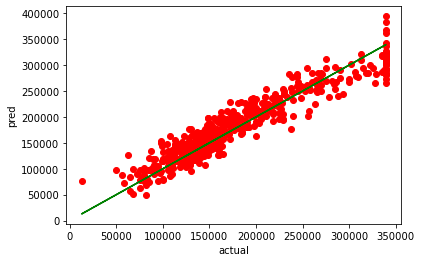

In [83]:
plot_real_vs_predicted(Y_test,preds_rfe)
plt.show()